<a href="https://colab.research.google.com/github/Utsuk7/Dog-Cat-Classification/blob/main/Dogs_v_cats_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:49<00:00, 24.0MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.2MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
#generators -> divides the data into batches and then a batch is loaded in the RAM thus saving ram
#name of generator image dataset directory

train_dataset=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
)
test_dataset=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#the values stored above are in form of numpy array from 0 to 256 ... now these needs to be converted in range of 0 to 1
#So NORMALISE
def process(image,label):
  image=tf.cast(image/255,tf.float32)
  return image,label

train_dataset=train_dataset.map(process)
test_dataset=test_dataset.map(process)

# CNN MODEL

In [ ]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset,epochs=10,validation_data=test_dataset)

Epoch 1/10
625/625 [==============================] - 53s 84ms/step - loss: 0.0306 - accuracy: 0.9907 - val_loss: 1.3548 - val_accuracy: 0.7834
Epoch 2/10
625/625 [==============================] - 54s 86ms/step - loss: 0.0230 - accuracy: 0.9920 - val_loss: 1.4178 - val_accuracy: 0.7834
Epoch 3/10
625/625 [==============================] - 58s 91ms/step - loss: 0.0272 - accuracy: 0.9912 - val_loss: 1.3614 - val_accuracy: 0.7908
Epoch 4/10
625/625 [==============================] - 74s 117ms/step - loss: 0.0196 - accuracy: 0.9948 - val_loss: 1.4105 - val_accuracy: 0.7864
Epoch 5/10
625/625 [==============================] - 63s 101ms/step - loss: 0.0185 - accuracy: 0.9947 - val_loss: 1.4830 - val_accuracy: 0.7876
Epoch 6/10
625/625 [==============================] - 76s 120ms/step - loss: 0.0222 - accuracy: 0.9933 - val_loss: 1.3266 - val_accuracy: 0.7842
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.0197 - accuracy: 0.9944 - val_loss: 1.4088 - val_accur

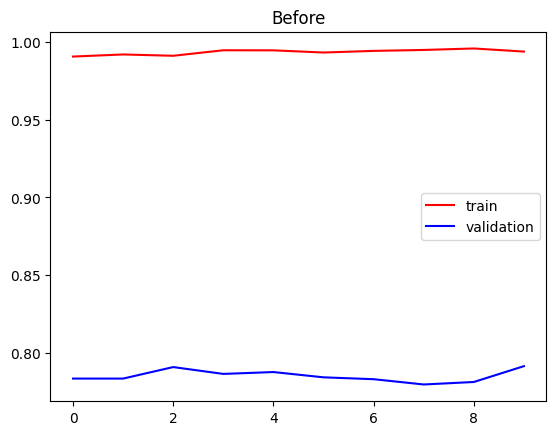

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.title("Before")
plt.legend()
plt.show()

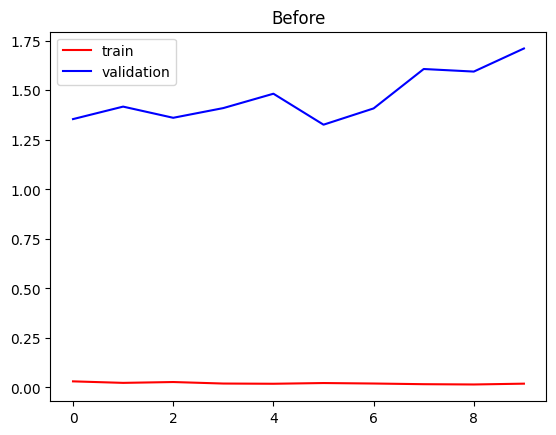

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title("Before")
plt.legend()
plt.show()

In [ ]:
# BatchNormalization and Dropout

In [ ]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset,epochs=10,validation_data=test_dataset)

Epoch 1/10
625/625 [==============================] - 70s 105ms/step - loss: 1.1779 - accuracy: 0.6127 - val_loss: 0.6230 - val_accuracy: 0.6886
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5545 - accuracy: 0.7182 - val_loss: 0.6380 - val_accuracy: 0.6322
Epoch 3/10
625/625 [==============================] - 69s 109ms/step - loss: 0.4616 - accuracy: 0.7849 - val_loss: 0.4907 - val_accuracy: 0.7794
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4049 - accuracy: 0.8164 - val_loss: 0.4701 - val_accuracy: 0.7900
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3322 - accuracy: 0.8548 - val_loss: 0.5553 - val_accuracy: 0.7316
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2598 - accuracy: 0.8913 - val_loss: 0.5289 - val_accuracy: 0.8030
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.1892 - accuracy: 0.9233 - val_loss: 0.6176 - val_ac

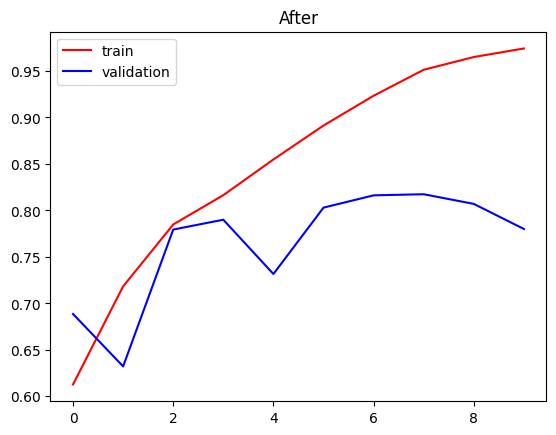

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.title("After")
plt.show()

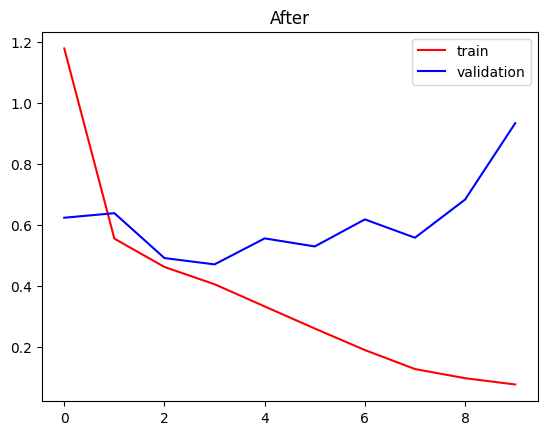

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title("After")
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img=cv2.imread('/content/dog.jpeg')

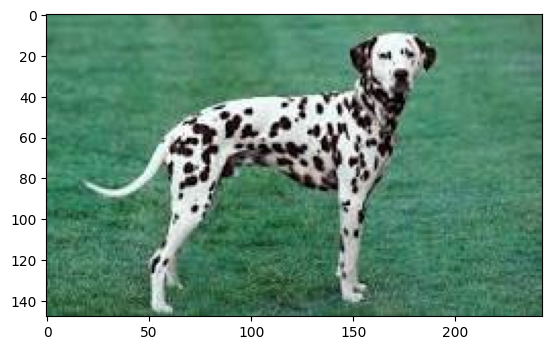

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(148, 243, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))

In [ ]:
test_input=test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 21ms/step


array([[0.]], dtype=float32)